In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('cleanedstockprice.csv')

In [ ]:
df.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume
0,0,AAL,2014-01-02,25,26,25,25,8998943
1,1,AAPL,2014-01-02,79,80,79,79,58791957
2,2,AAP,2014-01-02,110,112,109,110,542711
3,3,ABBV,2014-01-02,52,52,52,52,4569061
4,4,ABC,2014-01-02,70,70,69,70,1148391


**summary statistics**

**open column**

In [ ]:
mean_val = df['open'].mean()
median_val = df['open'].median()
mode_val = df['open'].mode()
std_val = df['open'].std()
print(f'summary statistics of open column: \nmean:{mean_val}\n median:{median_val}\n mode:{mode_val}\n standard_deviation:{std_val}')

summary statistics of open column: 
mean:86.35161978965651
 median:65.0
 mode:0    48
Name: open, dtype: int64
 standard_deviation:101.47073914768661


**high column**

In [ ]:
mean_val = df['high'].mean()
median_val = df['high'].median()
mode_val = df['high'].mode()
std_val = df['high'].std()
print(f'summary statistics of high column: \nmean:{mean_val}\n median:{median_val}\n mode:{mode_val}\n standard_deviation:{std_val}')

summary statistics of high column: 
mean:87.12977815836871
 median:66.0
 mode:0    48
Name: high, dtype: int64
 standard_deviation:102.31245882891234


**low column**

In [ ]:
mean_val = df['low'].mean()
median_val = df['low'].median()
mode_val = df['low'].mode()
std_val = df['low'].std()
print(f'summary statistics of low column: \nmean:{mean_val}\n median:{median_val}\n mode:{mode_val}\n standard_deviation:{std_val}')

summary statistics of low column: 
mean:85.55533979801878
 median:64.0
 mode:0    47
Name: low, dtype: int64
 standard_deviation:100.57020901329876


**close columns**

In [ ]:
mean_val = df['close'].mean()
median_val = df['close'].median()
mode_val = df['close'].mode()
std_val = df['close'].std()
print(f'summary statistics of close column: \nmean:{mean_val}\n median:{median_val}\n mode:{mode_val}\n standard_deviation:{std_val}')

summary statistics of close column: 
mean:86.3687906053004
 median:65.0
 mode:0    48
Name: close, dtype: int64
 standard_deviation:101.47264054635129


**volume columns**

In [ ]:
mean_val = df['volume'].mean()
median_val = df['volume'].median()
mode_val = df['volume'].mode()
std_val = df['volume'].std()
print(f'summary statistics of volume column: \nmean:{mean_val}\n median:{median_val}\n mode:{mode_val}\n standard_deviation:{std_val}')

summary statistics of volume column: 
mean:4253610.897777162
 median:2084896.5
 mode:0    1241019
Name: volume, dtype: int64
 standard_deviation:8232139.235882821


**Visualization of data distribution**

In [ ]:
df['symbol']

,symbol
0,AAL
1,AAPL
2,AAP
3,ABBV
4,ABC
...,...
497467,XYL
497468,YUM
497469,ZBH
497470,ZION


In [ ]:
df['symbol'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK',
       'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY', 'BDX',
       'BEN', 'BF.B', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK.B', 'BSX',
       'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA', 'CBG', 'CBOE', 'CBS',
       'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CHD', 'CHK',
       'CHRW', 'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA', 'CME',
       'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO',
       'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL',
       'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'C', 'DAL', 'D

In [ ]:
Top_10_volume = df.groupby('symbol')['volume'].sum().sort_values(ascending=False).head(10)
print(Top_10_volume)

symbol
BAC     89988444028
AAPL    45485758169
GE      41734050117
AMD     33522535638
F       33144701045
MSFT    30927601441
FB      29432418373
MU      28158553783
CHK     28080599383
INTC    27351266285
Name: volume, dtype: int64


A bar chart of top ten by volume

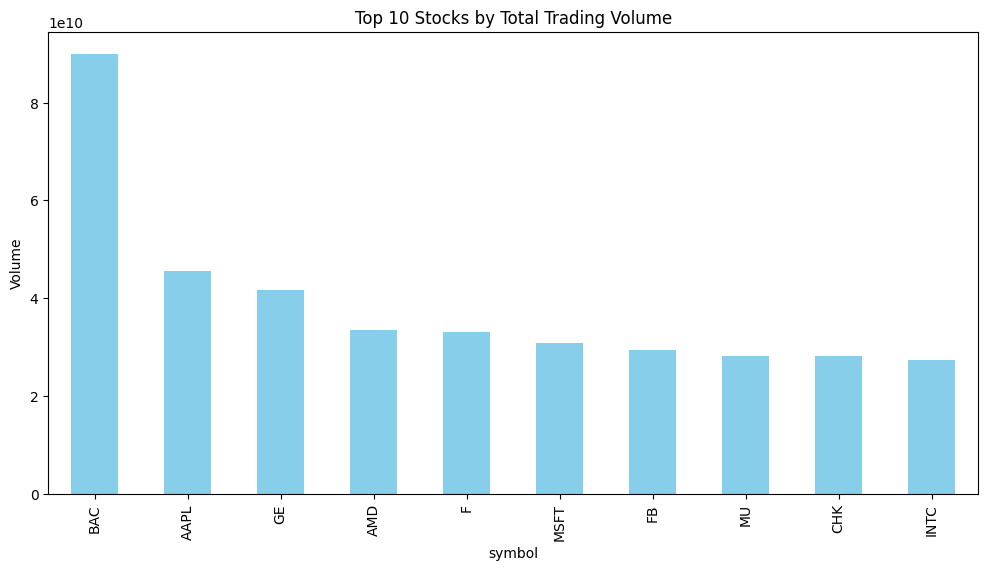

In [ ]:
plt.figure(figsize=(12, 6))
Top_10_volume.plot(kind='bar', color='skyblue')
plt.title('Top 10 Stocks by Total Trading Volume')
plt.ylabel('Volume')
plt.show()

Time series for the top ten symbol

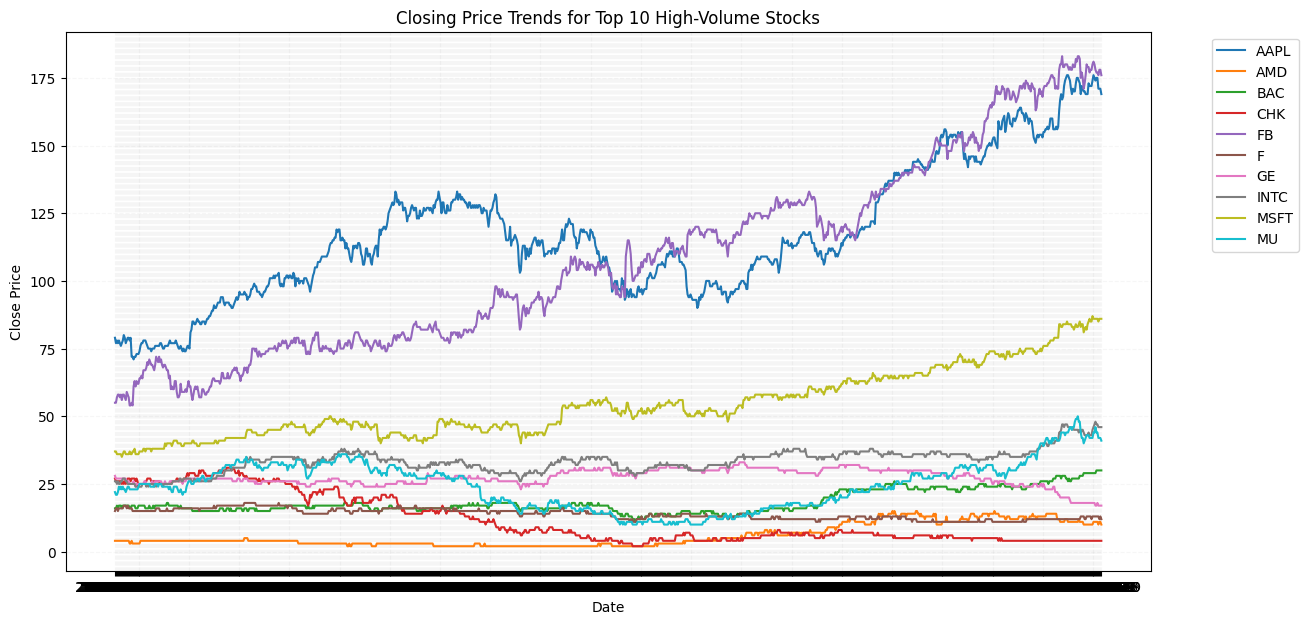

In [ ]:
# 1. Find the top 10 symbols by total volume
top_10_symbols = df.groupby('symbol')['volume'].sum().nlargest(10).index

# 2. Filter the original dataframe to only include these 10 stocks
top_10_df = df[df['symbol'].isin(top_10_symbols)]
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_10_df, x='date', y='close', hue='symbol')

plt.title('Closing Price Trends for Top 10 High-Volume Stocks')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Moves legend outside the plot
plt.grid(True, linestyle='--', alpha=0.1)
plt.show()


**Distribution analysis**

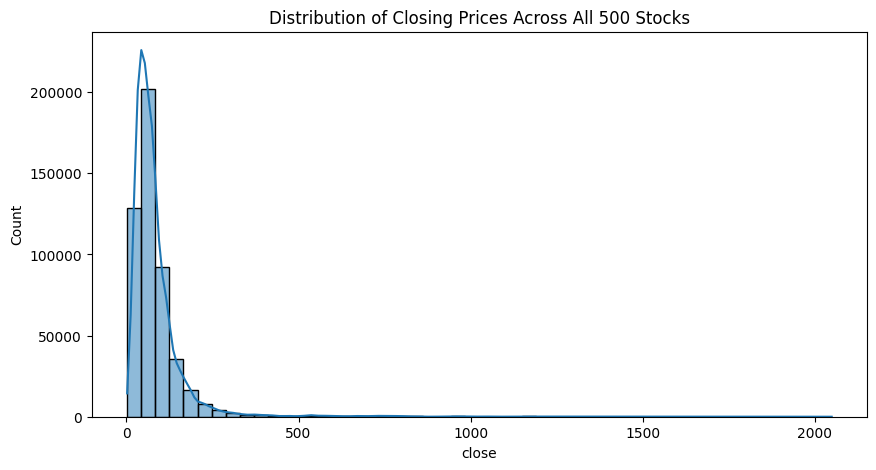

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices Across All 500 Stocks')
plt.show()

**Box plot to identify the outliers**

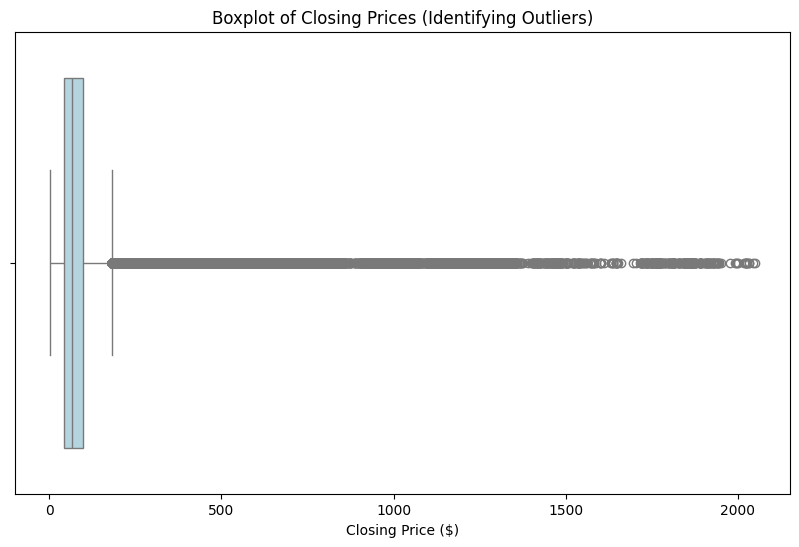

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['close'], color='lightblue')

plt.title('Boxplot of Closing Prices (Identifying Outliers)')
plt.xlabel('Closing Price ($)')
plt.show()

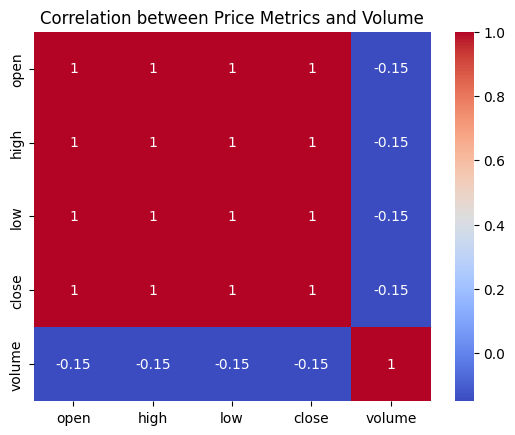

In [ ]:
# Select only the price and volume columns
price_cols = df[['open', 'high', 'low', 'close', 'volume']]
corr = price_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Price Metrics and Volume')
plt.show()


**Summary for your Report**

"The EDA reveals a market dominated by lower-priced stocks (Median < 100) with a significant 'Right Tail' of high-value outliers. Price metrics are perfectly correlated (1.00), while trading volume shows a slight inverse relationship with price (-0.15), indicating that more expensive stocks typically see less trading volume."